**1) Problem Statement:**
   - The goal of this project is to understand how various features such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course affects the student performance.


**2) Dataset Collection:**
   - Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
   - This dataset consists of 8 columns such as Gender, Race Ethnicity, Parental Level of Education, Lunch, Test Preparation Course, Math Score, Reading Score, Writing Score.


__2.1 Import Requred Libraries__

In [2]:
import kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**2.2 Download dataset to custom directory using kaggle api**

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    'spscientist/students-performance-in-exams',
    path=r'E:\End_To_End_ML_Project\End_To_End_MLProject.egg-info\notebook\data',
    unzip=True)

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


**2.3 Read CSV data into pandas dataframe**

In [4]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [5]:
df.head()  ###Show top 5 records.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape ###Shape of dataset

(1000, 8)

**2.4 Dataset Information**
   - Gender : Sex of students -> Male or Female
   - Race/Ethnicity : Ethnicity of students -> Group A, Group B, Group C, Group D, Group E
   - Parental level of education : Parent's final education -> Bachelor's degree, Some college, Master's degree, Associate's degree, High School
   - Lunch : Having lunch before test -> Standard or Free/Reduced
   - Test Preparation Course : Complete or not complete before test
   - Math Score
   - Reading Score
   - Writing Score

**3) Data Checks To Perform**

In [7]:
df.isnull().sum()   ###Check missing values.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

__There are no missing values.__

In [8]:
df.duplicated().sum()   ###Check duplicate values

np.int64(0)

**There are no duplicate values in dataset.**

In [9]:
df.info()     ###Check null and datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()    ###Check the number of unique values of each column.

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()  ###Check statistics of dataset.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()    ###Exploring data.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'Gender' Feature:", end=" ")
print(df['gender'].unique())
print("Categories in 'Race/Ethnicity' Feature:", end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'Parental Level of Education' Feature:", end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' Feature:", end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' Feature:", end=" ")
print(df['test preparation course'].unique())

Categories in 'Gender' Feature: ['female' 'male']
Categories in 'Race/Ethnicity' Feature: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental Level of Education' Feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Feature: ['standard' 'free/reduced']
Categories in 'test preparation course' Feature: ['none' 'completed']


**Define Numeric and Categorical Features**

In [20]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features: {numerical_features}.")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}.")

We have 3 numerical features: ['math score', 'reading score', 'writing score'].
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'].


__3.8 Adding columns for 'Total Score' and 'Average'__

In [21]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [22]:
math_full = (df['math score'] == 100).sum()
reading_full = (df['reading score'] == 100).sum()
writing_full = (df['writing score'] == 100).sum()

print(f"Number of students with full marks in maths: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [23]:
math_less_20 = (df['math score'] <= 50).sum()
reading_less_20 = (df['reading score'] <= 50).sum()
writing_less_20 = (df['writing score'] <=50).sum()

print(f"Number of students with score less than 50 in maths: {math_less_20}")
print(f"Number of students with score less than 50 in reading: {reading_less_20}")
print(f"Number of students with score less than 50 in writing: {writing_less_20}")

Number of students with score less than 50 in maths: 150
Number of students with score less than 50 in reading: 97
Number of students with score less than 50 in writing: 124


**Observation**
   - Above analysis shows that student's best performance is in reading subject and worst performance is in maths subject.

**4) Exploring Data (Visualization)**

__4.1 Visualize average score distribution to make some conclusion.__
   - Histogram
   - Kernel Distribution Function (KDE)

**4.1.1 Histogram and KDE**

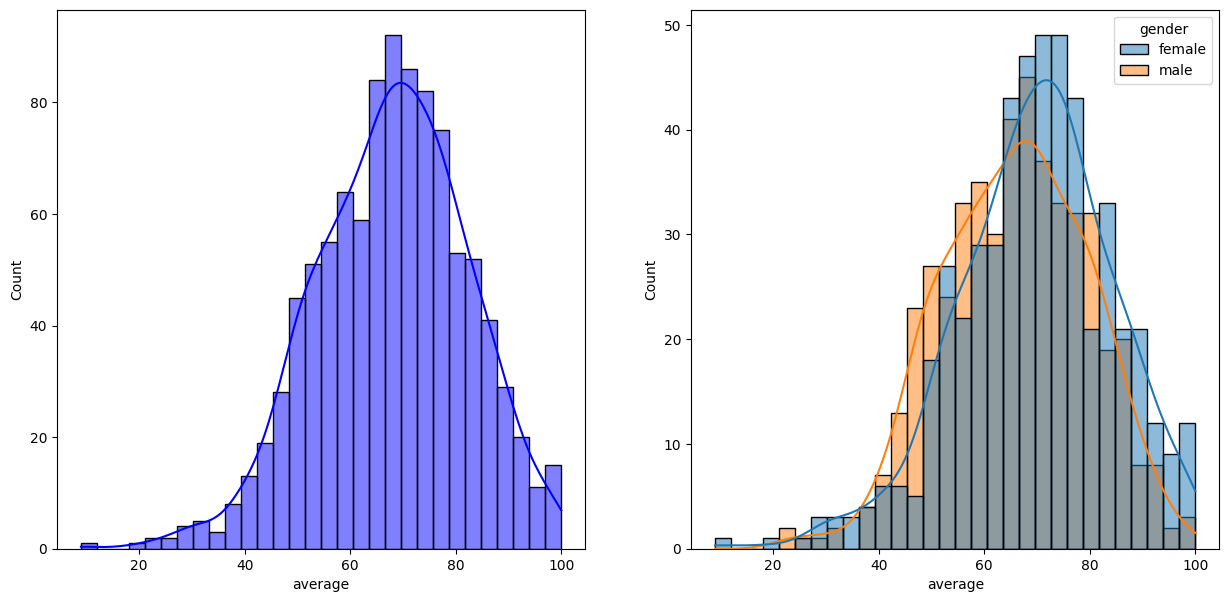

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

__Observation:__
- It is observed that female students performed better than male students.

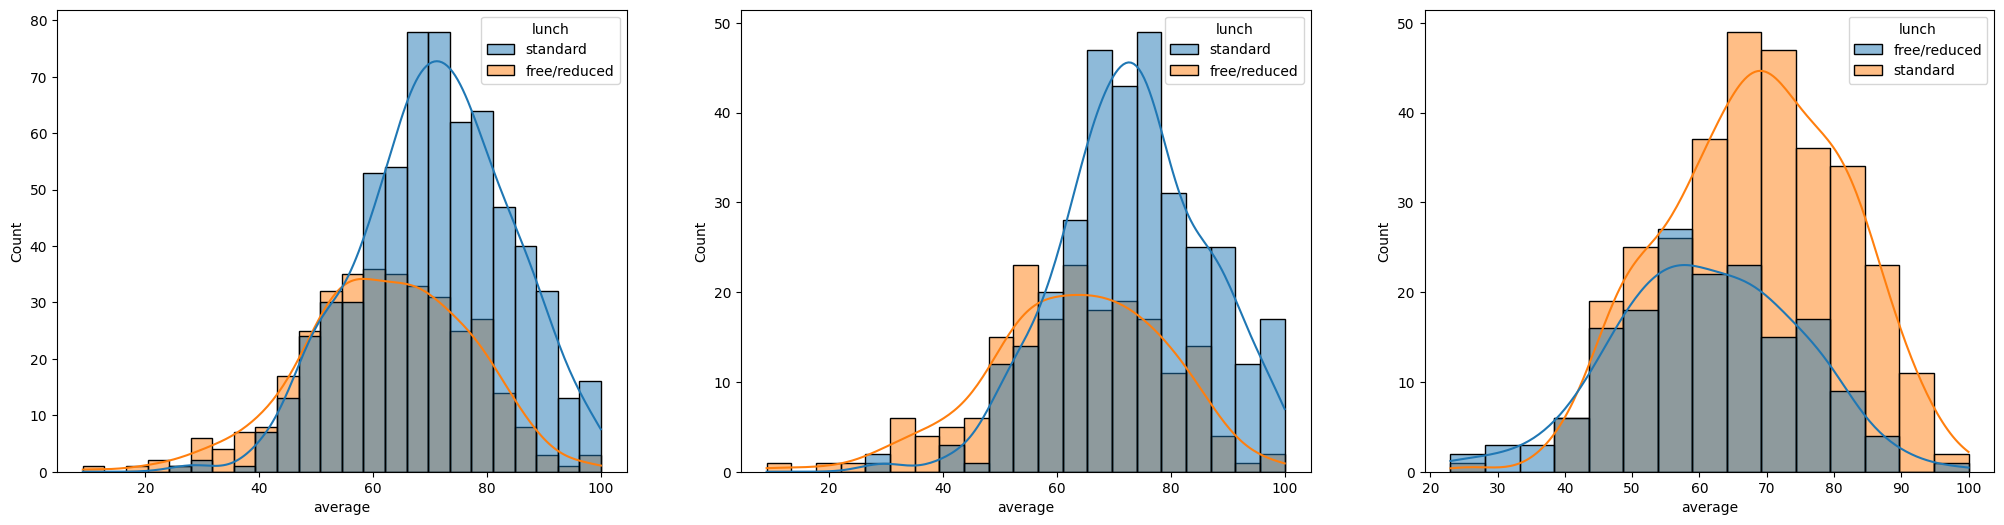

In [25]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.show()

__Observation:__
- Above plots show that standard lunch helps to perform well in examx, whether it's a male or female student.

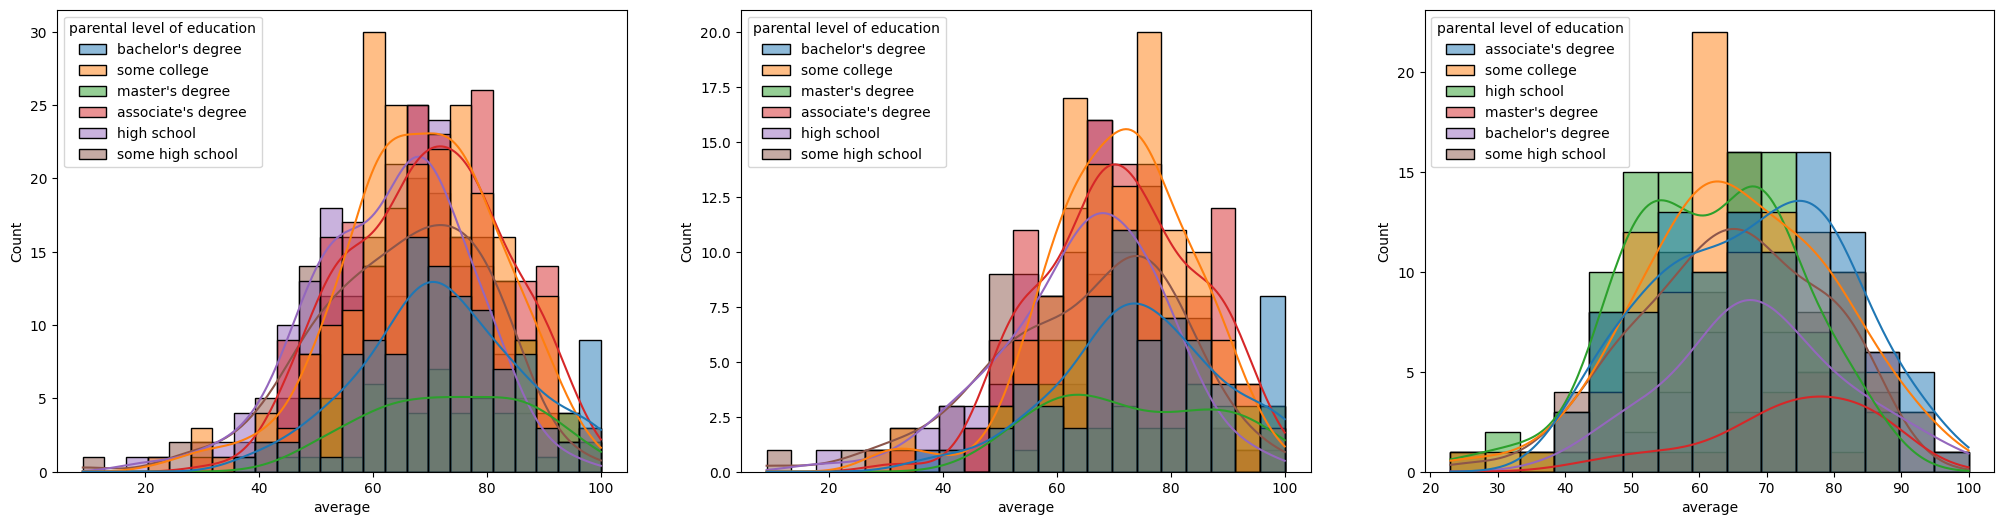

In [26]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental level of education')
plt.show()

**Observation**
- In general, it is observed that parental education doesn't help student to perform well in exam.

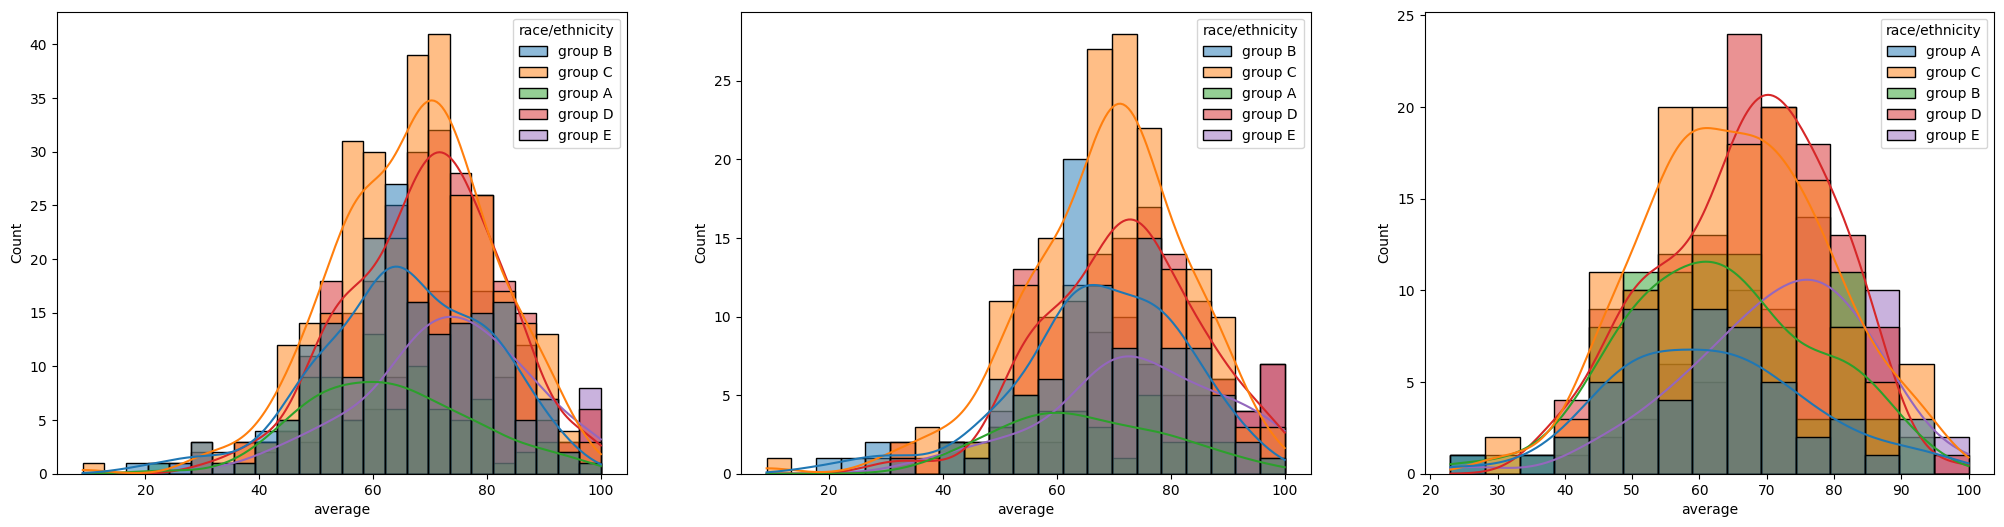

In [27]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='race/ethnicity' )
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='race/ethnicity')
plt.show()

**Observation**
- Group A and Group E students underperform irrespecitve of whether they are male or female students.

**4.2 Maximum score of students in all three subjects**

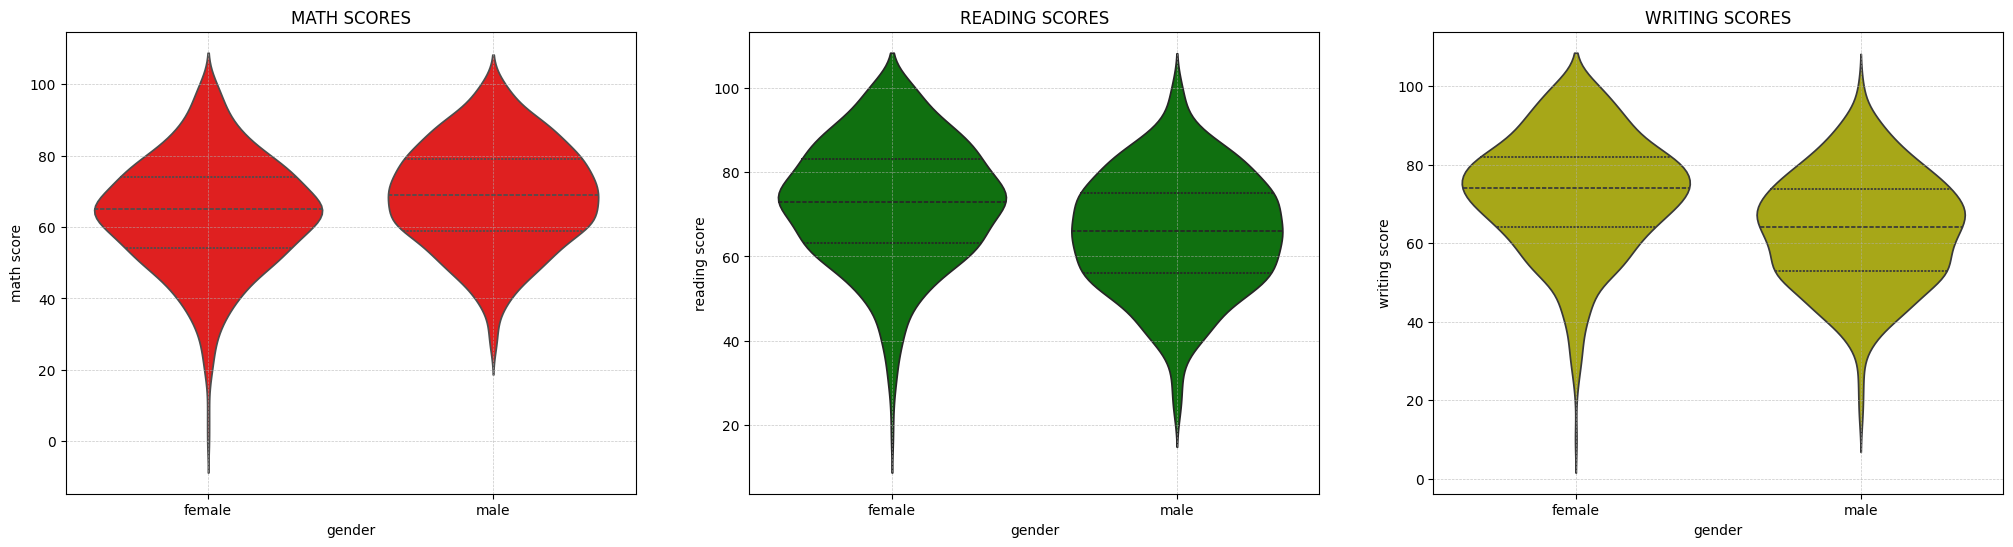

In [28]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(data=df, x='gender', y='math score', color='r', inner='quartile')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(data=df, x='gender', y='reading score', color='g', inner='quartile')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(data=df, x='gender', y='writing score', color='y', inner='quartile')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

__Observation__
- Above graph shows that male students outperform in maths subject, wheras female students perfomed better in reading and writing subjects.

**4.3 Multivariate analysis using pieplot**

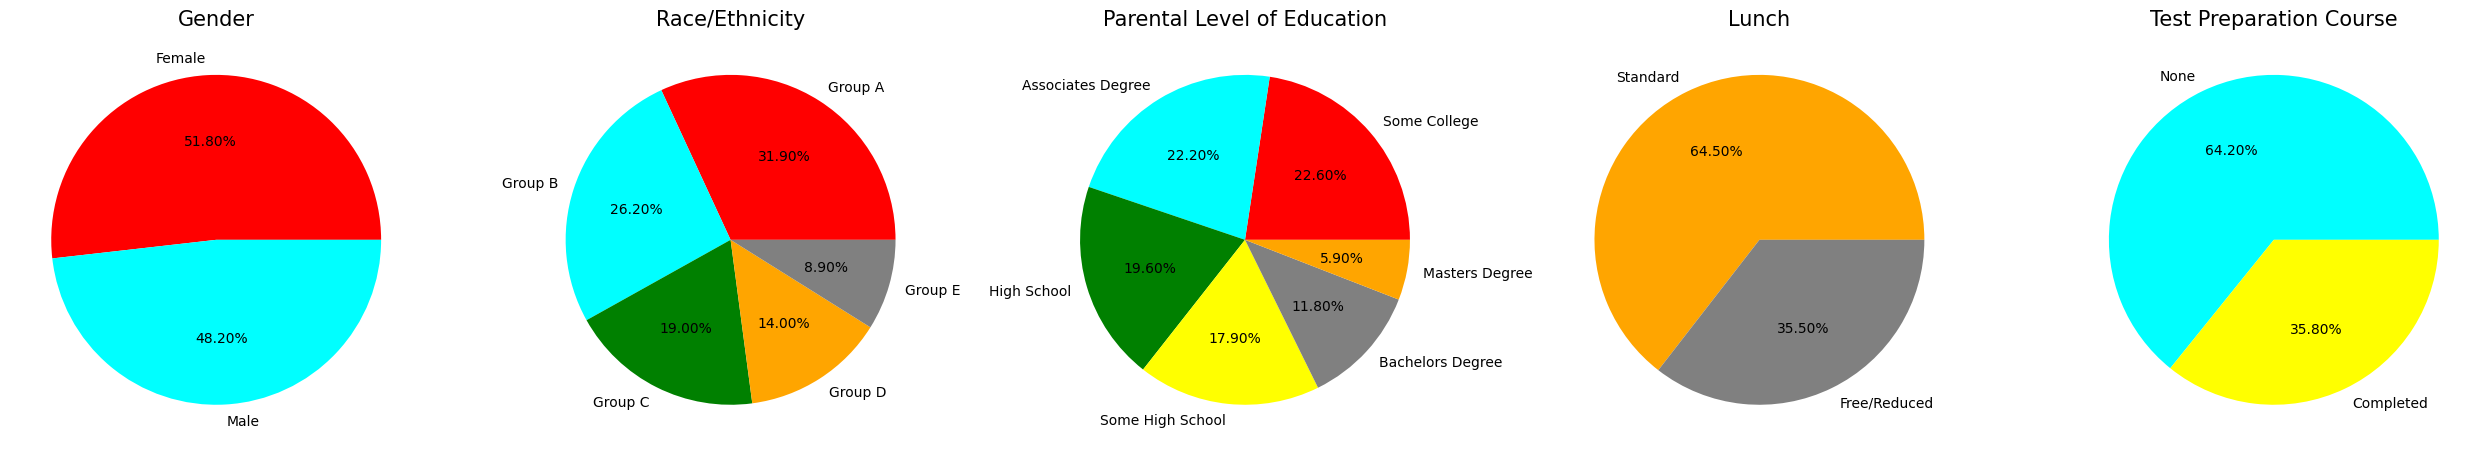

In [29]:
fig, axs = plt.subplots(1, 5, figsize=(25,10))
plt.subplot(151)
gender_count = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'cyan']
plt.pie(gender_count, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')


plt.subplot(152)
race_count = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'cyan', 'green', 'orange', 'grey']
plt.pie(race_count, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=15)
plt.axis('off')


plt.subplot(153)
parent_education_count = df['parental level of education'].value_counts()
labels = 'Some College', 'Associates Degree', 'High School', 'Some High School', 'Bachelors Degree', 'Masters Degree'
color = ['red', 'cyan', 'green', 'yellow', 'grey', 'orange']
plt.pie(parent_education_count, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Parental Level of Education', fontsize=15)
plt.axis('off')


plt.subplot(154)
lunch_count = df['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = 'orange', 'grey'
plt.pie(lunch_count, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=15)
plt.axis('off')


plt.subplot(155)
test_preparation_count = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = 'cyan', 'yellow'
plt.pie(test_preparation_count, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Test Preparation Course', fontsize=15)
plt.axis('off')


plt.tight_layout()
plt.show()

__Observation__
- Female students are greater than 50%.
- Number of students are greater in Group A.
- Number of students whose parental education is 'Some College' is slightly greater than parents with 'Associates Degree.'
- Number of students having standard lunch is greater than the students having 'Free/Reduced' lunch.
- Number of students who have not completed the 'Test Preparation Course' before exam is greater than the students completed the course. 

**4.4 Feature Wise Visualization**

**4.4.1 Gender Column**
- How is the distribution of Gender?
- Is gender has any impact on student's performance?

__Univariate Analysis (How is the distribution of Gender)__

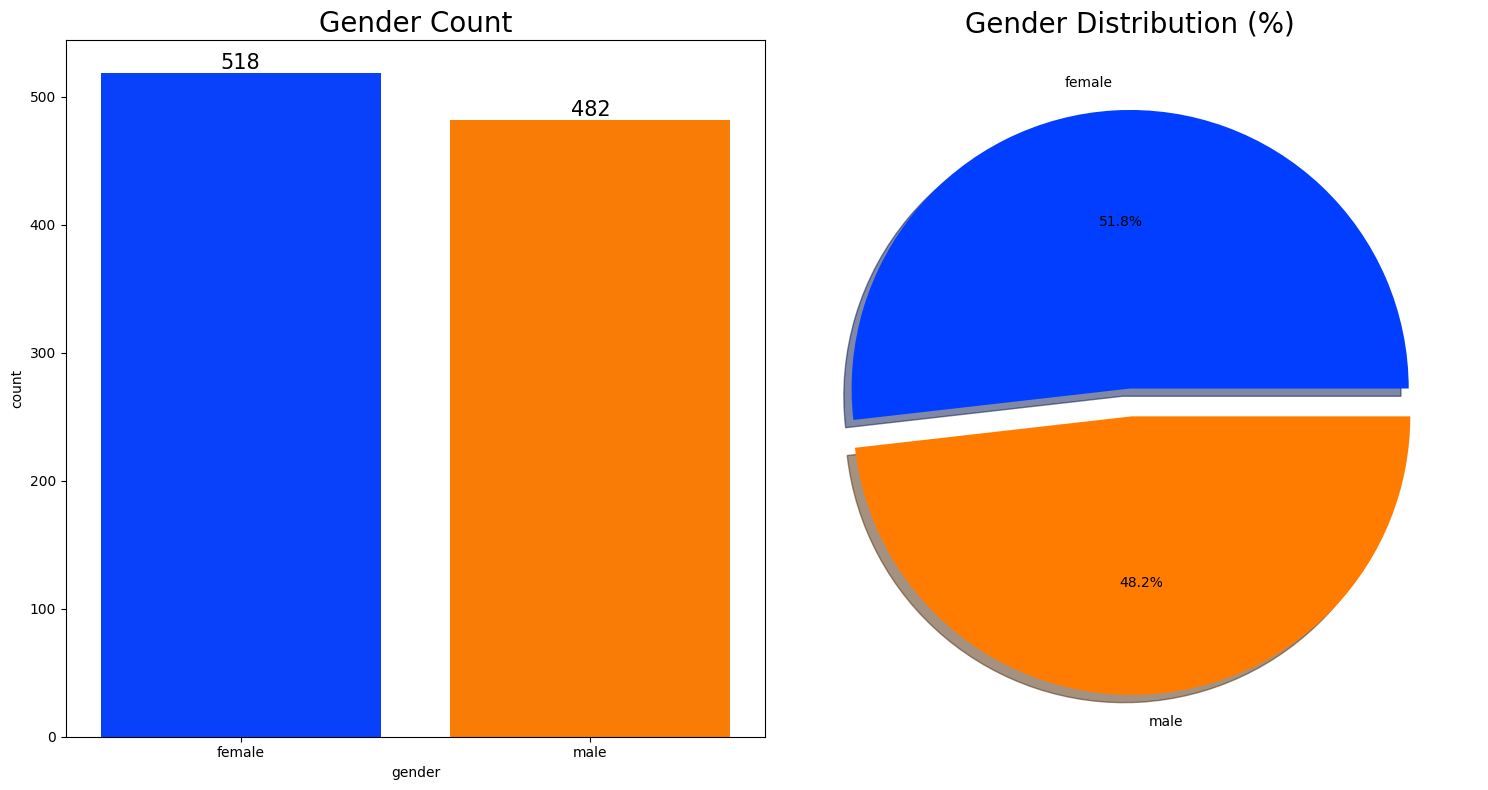

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
order = ['Female', 'Male']
palette = sns.color_palette('bright', n_colors=len(order))

### First Plot: Countplot
sns.countplot(data = df, x=df['gender'], palette=palette, ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)
axs[0].set_title('Gender Count', fontsize=20)

### Second Plot: Pie Chart
gender_counts = df['gender'].value_counts()
labels = df['gender'].value_counts().index
axs[1].pie(gender_counts, labels=labels, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=palette)
axs[1].set_title('Gender Distribution (%)', fontsize=20)

plt.tight_layout()
plt.show()

**Observation**
- Female student count is 518, which is slightly more than Male student count as male student count is 418.

__Bivariate Analysis (Is gender has any impact on student's performance?)__

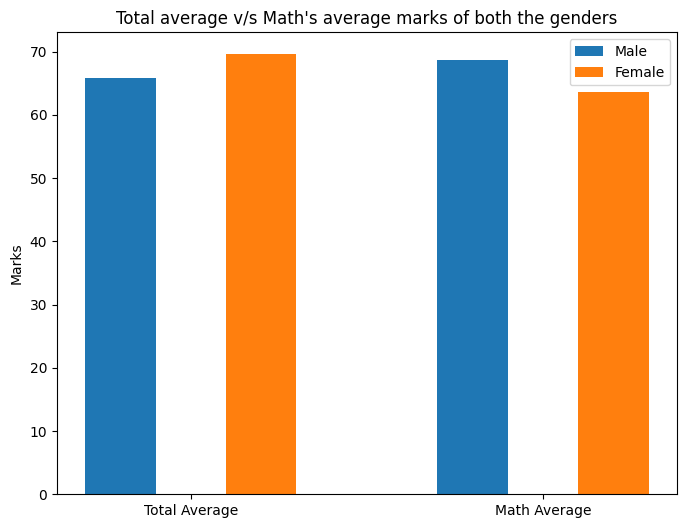

In [23]:
plt.figure(figsize=(8, 6))

gender_group = df.groupby('gender').mean(numeric_only=True)
female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.2, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.2, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math's average marks of both the genders")
plt.legend()
plt.show()

__Observation__
- Female students have total average more than male students.
- Male students are good in maths subject than female students.

**4.4.2 Race/Ethnicity Column**
- How is Group wise distribution?
- Is Race/Ethnicity has any impact on student's performance?

__Univariate Analysis (How is Group wise distribution)__

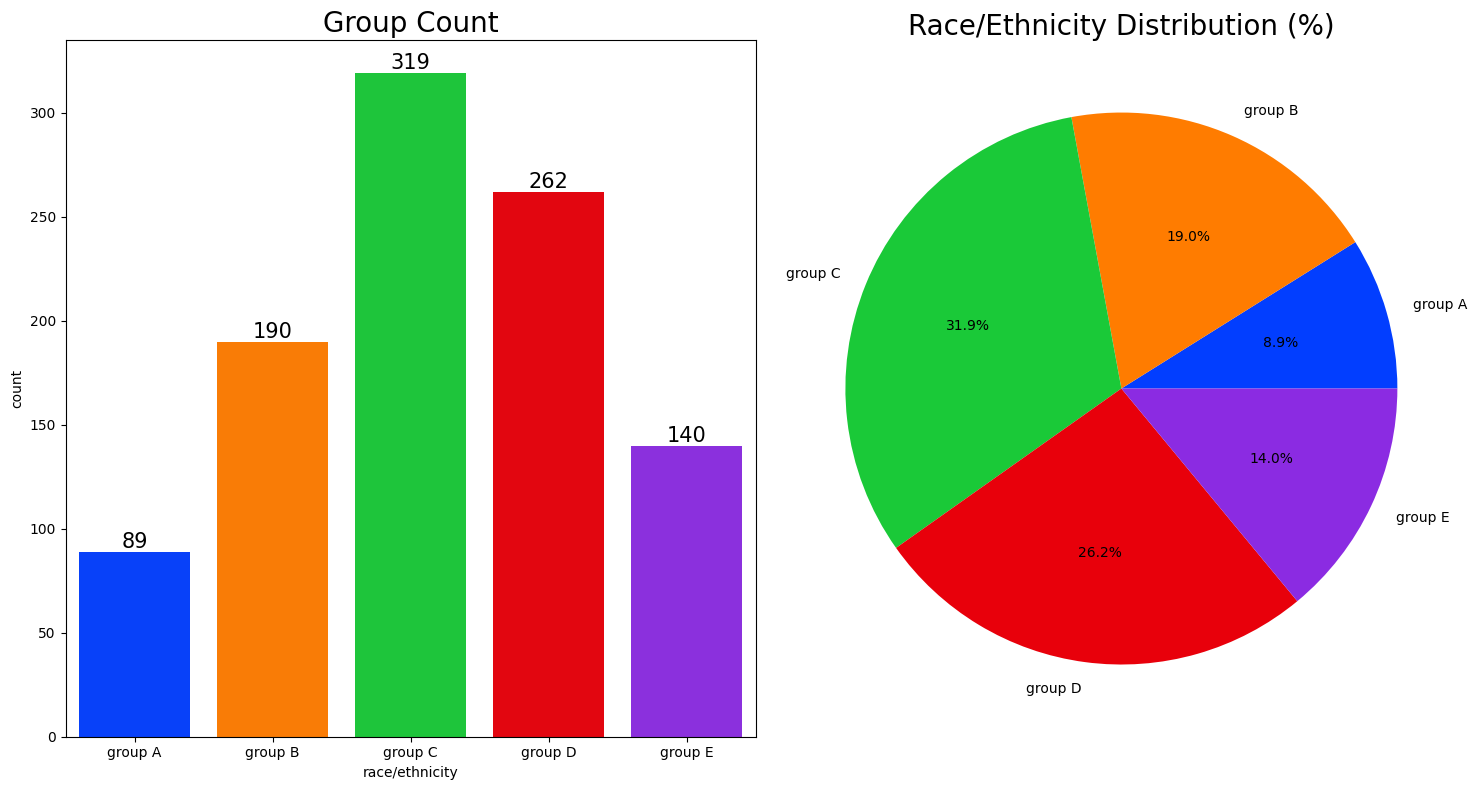

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

order = ['group A', 'group B', 'group C', 'group D', 'group E']
palette = sns.color_palette('bright', n_colors=len(order))

### First Plot: Countplot
sns.countplot(data=df, x=df['race/ethnicity'], order = order, 
              palette=palette, ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)
axs[0].set_title('Group Count', fontsize=20)

### Second Plot: Pie Chart
race_counts = df['race/ethnicity'].value_counts().reindex(order)
labels = df['race/ethnicity'].value_counts().index
axs[1].pie(race_counts, labels=order, autopct='%1.1f%%', colors=palette)
axs[1].set_title('Race/Ethnicity Distribution (%)', fontsize=20)

plt.tight_layout()
plt.show()

__Observation__
- Group C has highest number of students as compared to other groups whereas Group C has least number of studnets.

**Bivariate Analysis (Is Race/Ethnicity has any impact on student's performance)**

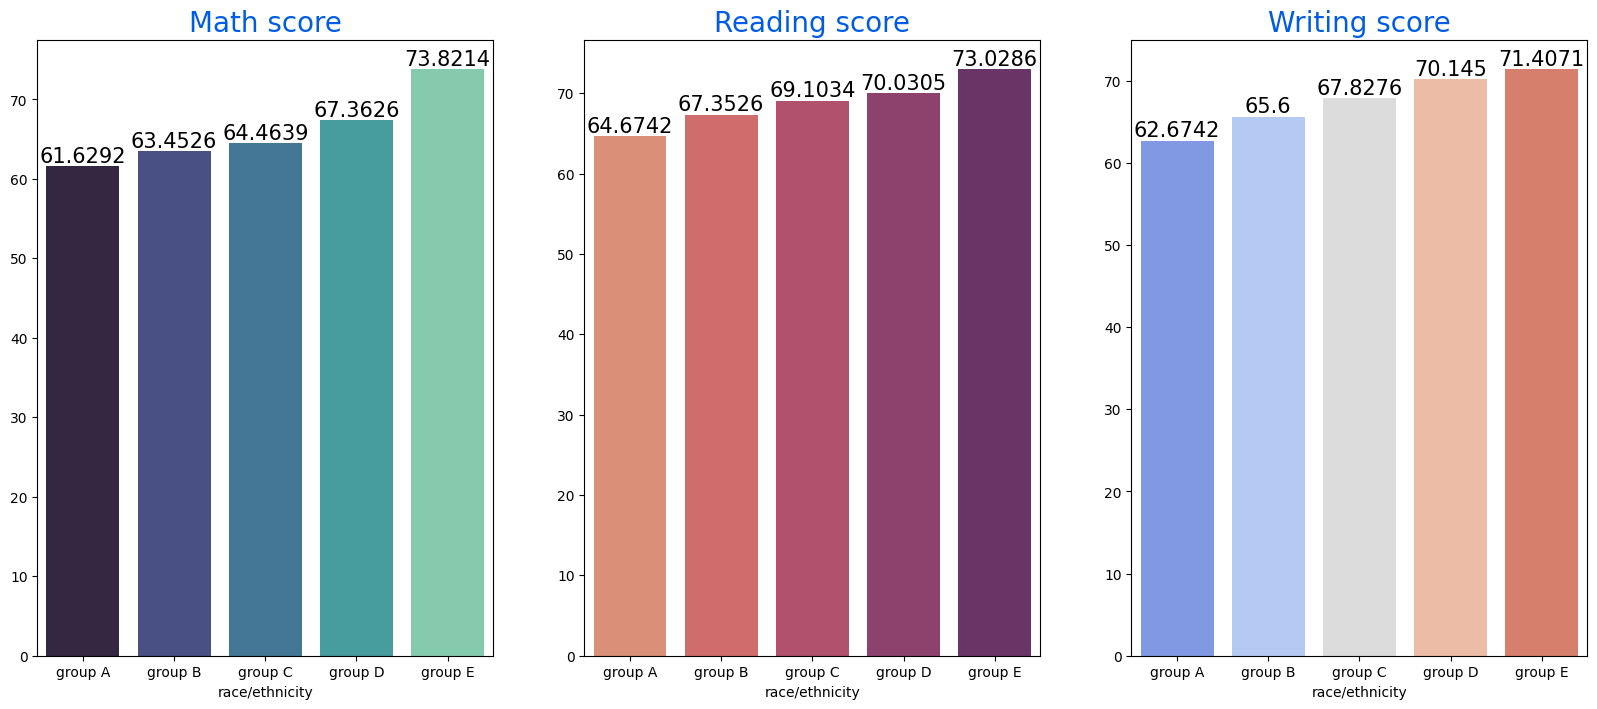

In [75]:
race_group = df.groupby('race/ethnicity')
fig,ax = plt.subplots(1,3,figsize=(20,8))

###Math score bar graph
sns.barplot(x=race_group['math score'].mean().index,y=race_group['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

###Reading score bar graph
sns.barplot(x=race_group['reading score'].mean().index,y=race_group['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

###Writing score bar graph
sns.barplot(x=race_group['writing score'].mean().index,y=race_group['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

__Observation__
- Group E students have highest marks and Group A students have lowest marks.

**4.4.3 Parental Level of Education Column**
- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

**Univariate Education (What is educational background of student's parent?)**

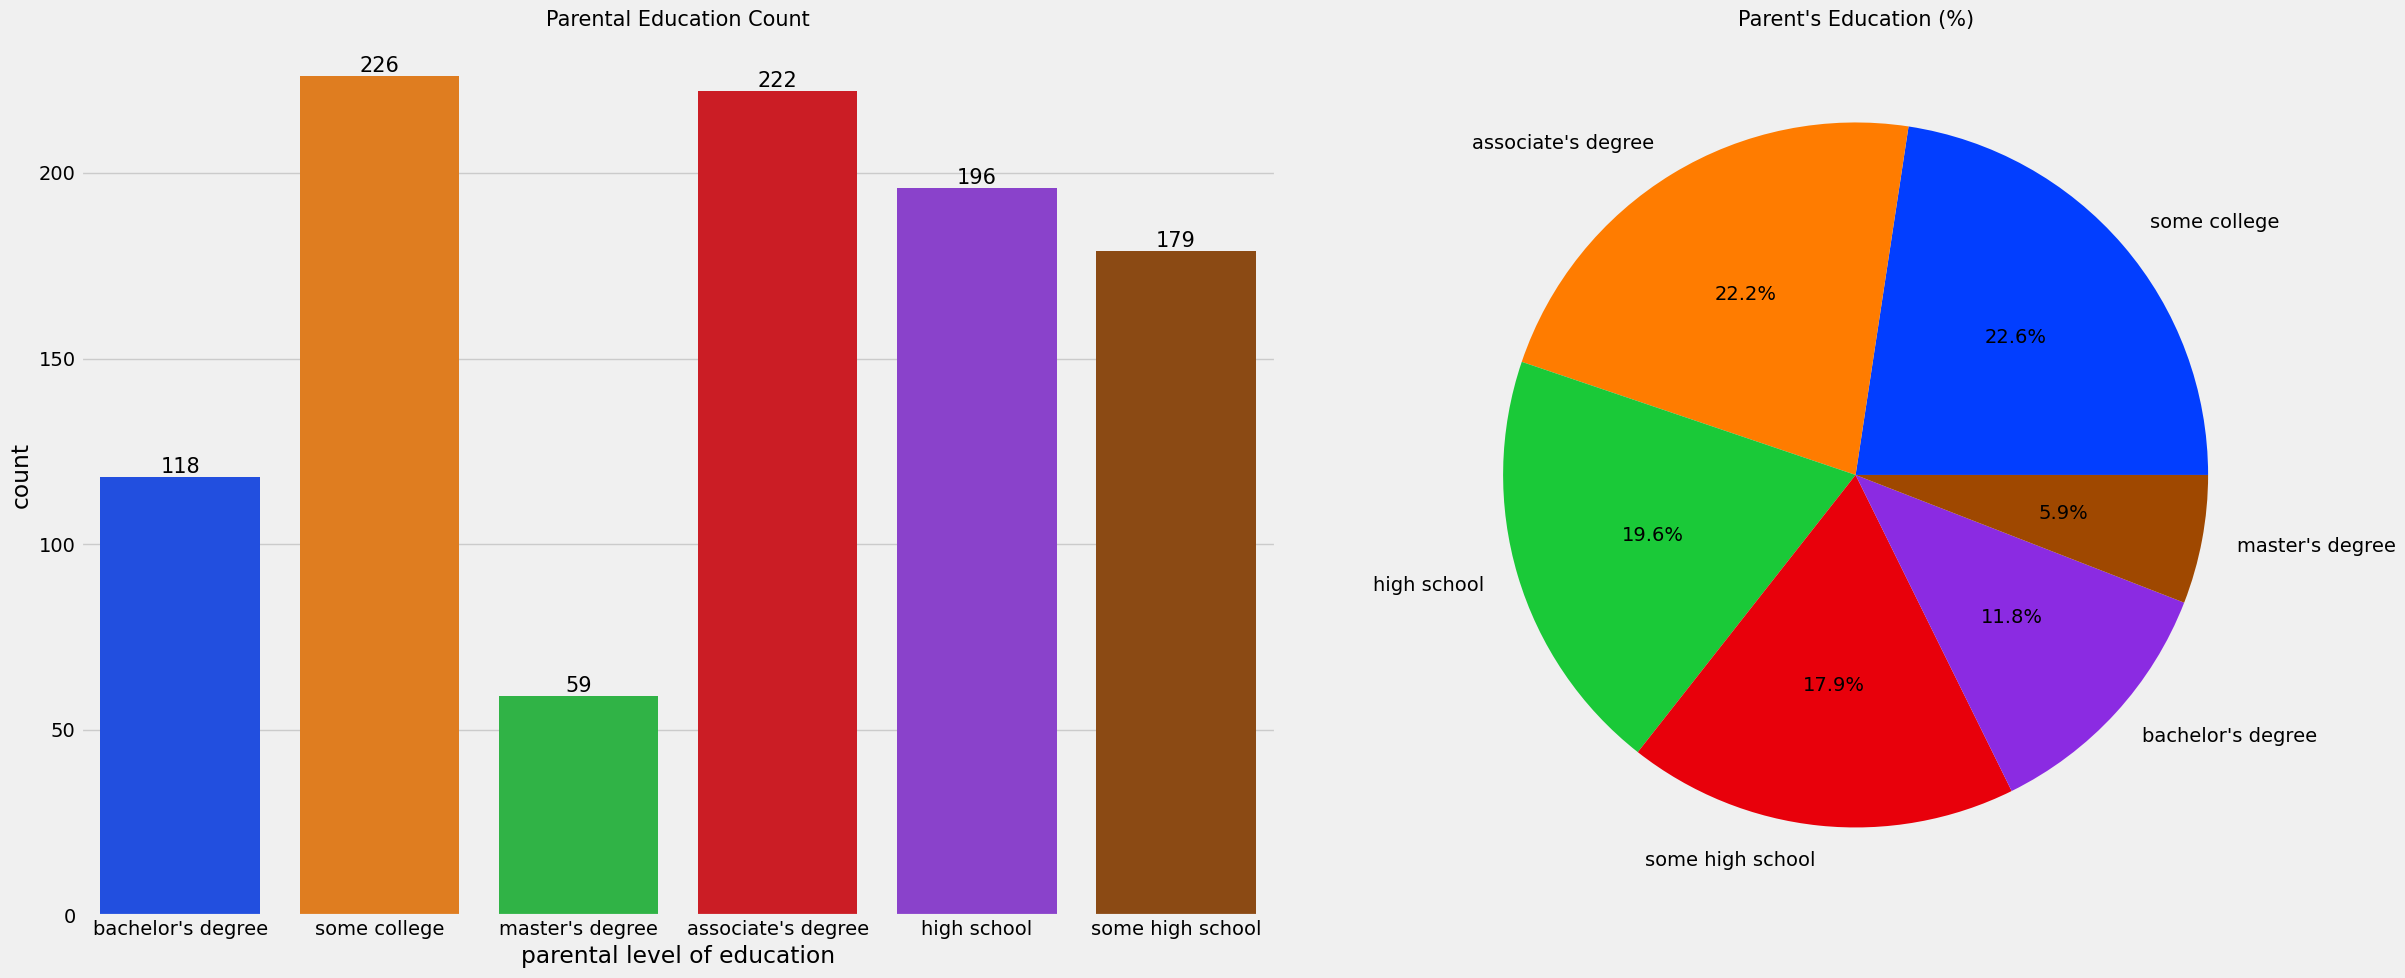

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(25,10))

order = ['bachelors degree', 'some college', 'masters degree', 'associates degree', 'high school', 'some high school']
palette = sns.color_palette('bright', n_colors=len(order))

### First Plot: Countplot
plt.subplot(121)
sns.countplot(data=df, x=df['parental level of education'], palette=palette, ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)
axs[0].set_title('Parental Education Count', fontsize=15)

### Second Plot: Pie Chart
parent_counts = df['parental level of education'].value_counts()
labels = df['parental level of education'].value_counts().index
axs[1].pie(parent_counts, labels=labels, autopct='%1.1f%%', colors=palette)
axs[1].set_title("Parent's Education (%)", fontsize=15)

plt.tight_layout()
plt.show()

**Observation**
- Highest number of parents belong to some college whereas least number of parents have master's degree.

__Bivariate Analysis (Is parental education has any impact on student's performance?)__

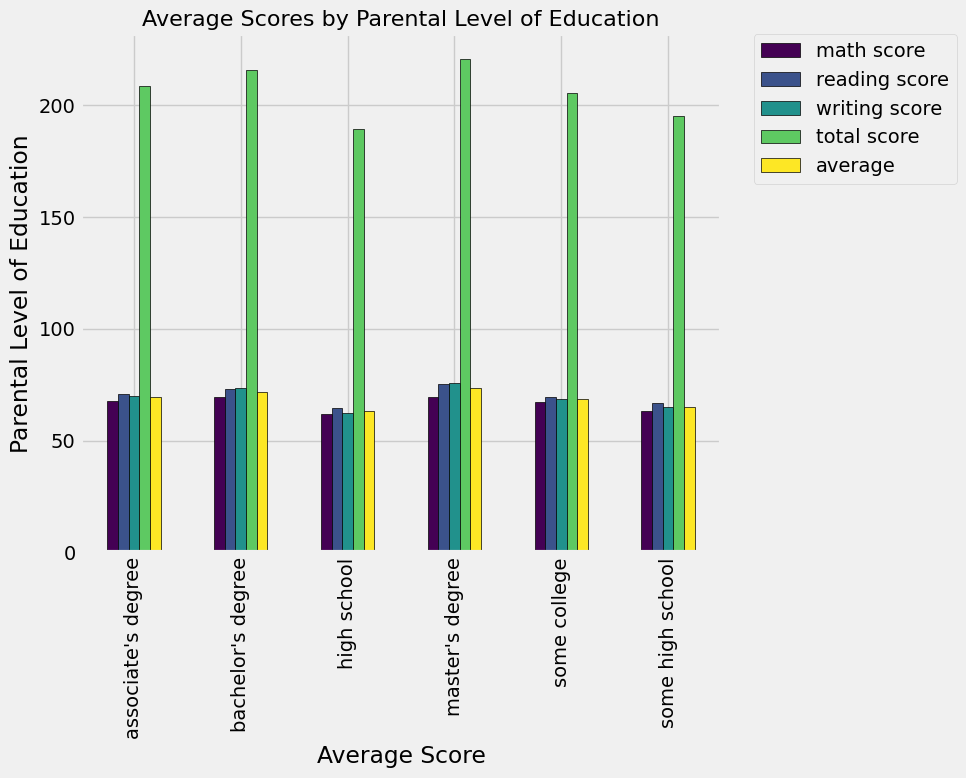

In [152]:
pr_education_group = df.groupby('parental level of education')[df.select_dtypes('number').columns].mean()

pr_education_group.plot(
    kind='bar',
    figsize=(10, 8),
    colormap='viridis', 
    edgecolor='black'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average Scores by Parental Level of Education', fontsize=16)
plt.xlabel('Average Score')
plt.ylabel('Parental Level of Education')
plt.tight_layout()
plt.show()

**Observation**
- Students whose parents have master's degree, scored higherd than other students.

**4.4.2 Lunch Column**
- Which type of lunch is most common among students?
- What is the effect of lunch type on test results?

**Univariate Analysis (Which type of lunch is most common among students?)**

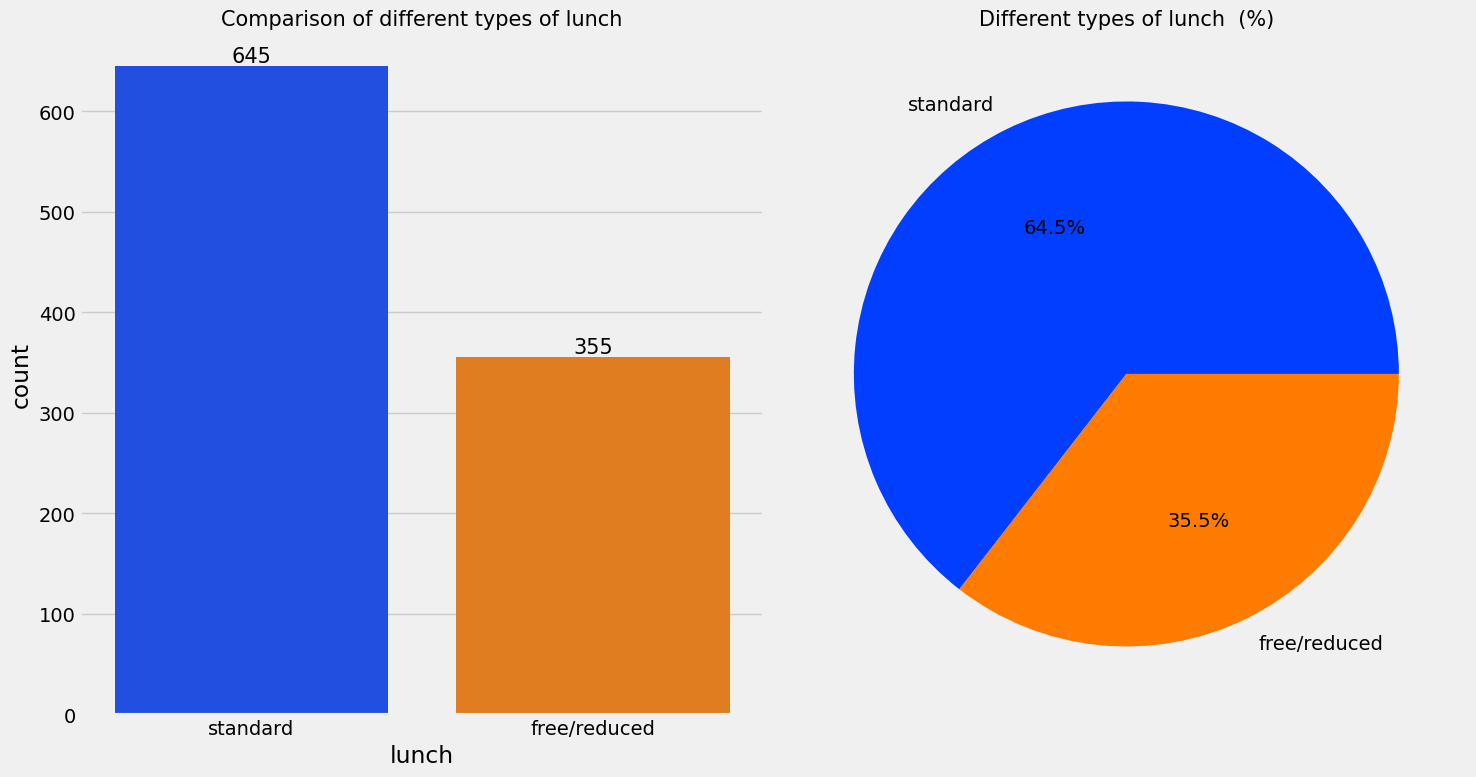

In [167]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

order = ['standard', 'free/reduced']
palette = sns.color_palette('bright', n_colors=len(order))

### First Plot: Countplot
plt.subplot(121)
sns.countplot(data=df, x=df['lunch'], palette=palette, ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)
axs[0].set_title('Comparison of different types of lunch', fontsize=15)

## Second Plot: Pie Chart
lunch_counts = df['lunch'].value_counts()
labels = df['lunch'].value_counts().index
axs[1].pie(lunch_counts, labels=labels, autopct='%1.1f%%', colors=palette)
axs[1].set_title("Different types of lunch  (%)", fontsize=15)

plt.tight_layout()
plt.show()

**Observation**
- Students having standard lunch are more than the students who had free/reduced lunch.

**Bivariate Analysis (Is lunch type intake has any impact on students performance?)**

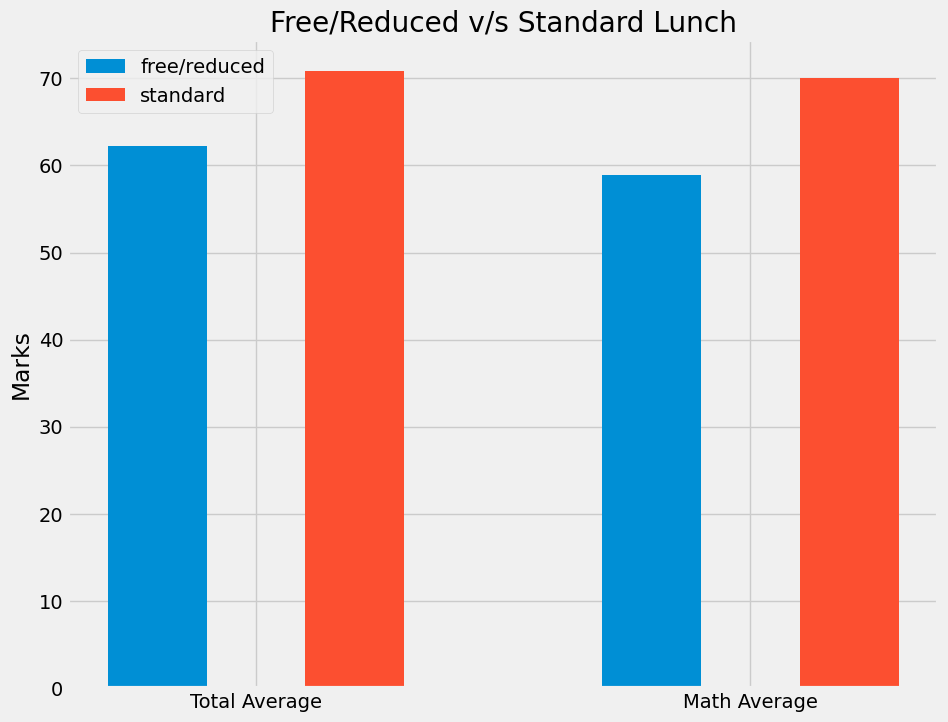

In [178]:
plt.figure(figsize=(10, 8))

lunch_group = df.groupby('lunch').mean(numeric_only=True)
free_reduced = [lunch_group['average'][0], lunch_group['math score'][0]]
standard = [lunch_group['average'][1], lunch_group['math score'][1]]

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, free_reduced, 0.2, label = 'free/reduced')
plt.bar(X_axis + 0.2, standard, 0.2, label = 'standard')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Free/Reduced v/s Standard Lunch")
plt.legend()
plt.show()

__Observation__
- Students who had standard lunch scored more than the students having free/reduced lunch.

__4.4.5 Test Preparation Course Column__
- Is test preparation course has any impact on student's performance?

**Bivariate Analysis**

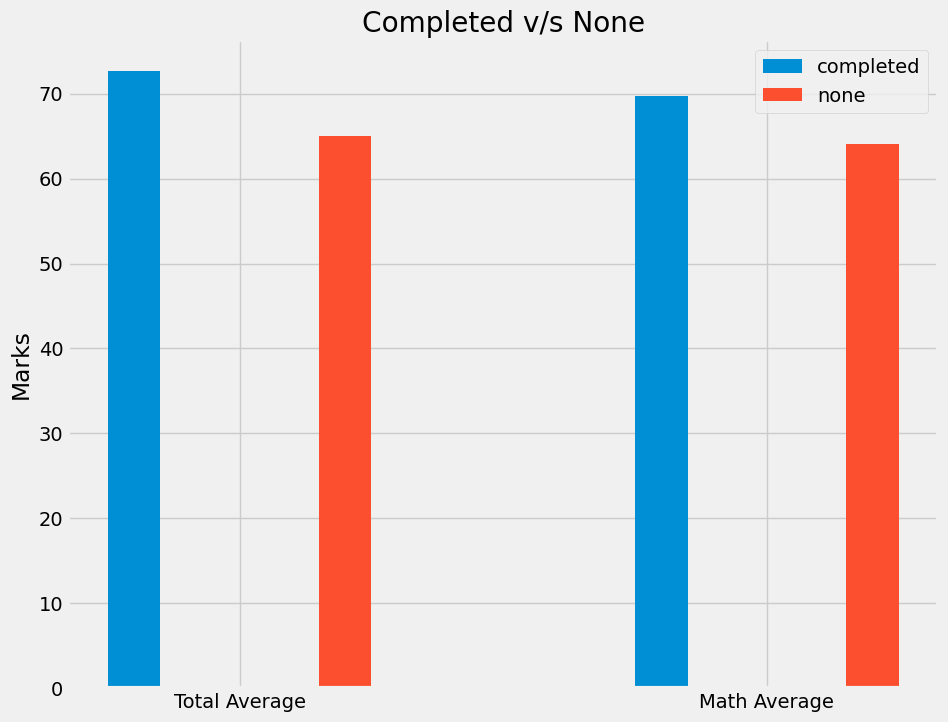

In [183]:
plt.figure(figsize=(10,8))

test_pr_group = df.groupby('test preparation course').mean(numeric_only=True)
completed = [test_pr_group['average'][0], test_pr_group['math score'][0]]
none = [test_pr_group['average'][1], test_pr_group['math score'][1]]

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, completed, 0.1, label='completed')
plt.bar(X_axis+0.2, none, 0.1, label='none')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Completed v/s None")
plt.legend()
plt.show()

__Observation__
- Students who completed 'test preparation course' scored higher marks.

**Checking Outliers**

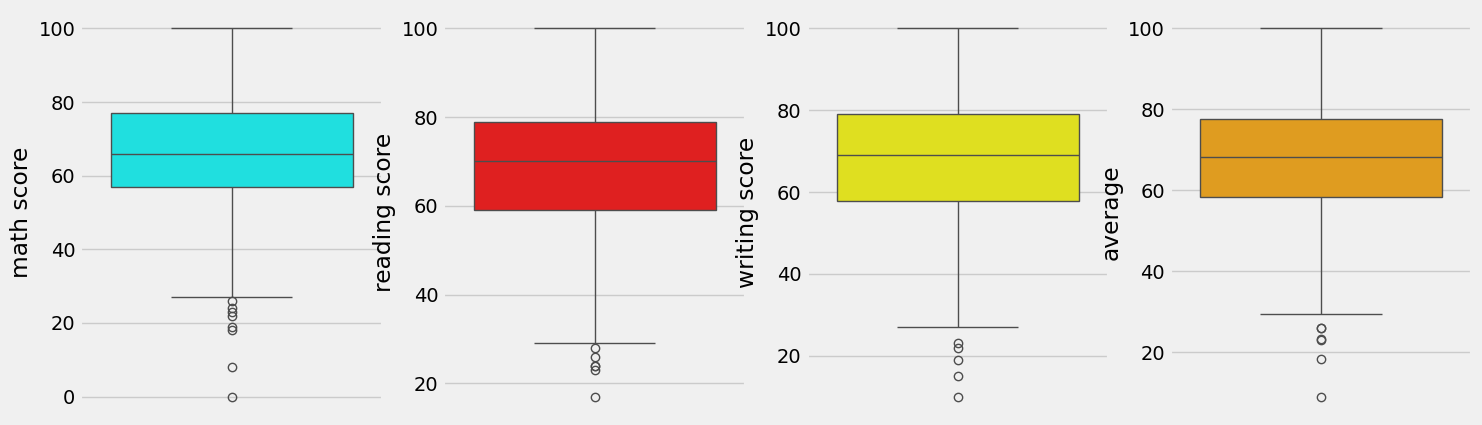

In [185]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='cyan')
plt.subplot(142)
sns.boxplot(df['reading score'],color='red')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='orange')
plt.show()

__4.4.7 Multivariate Analysis using pairplot__

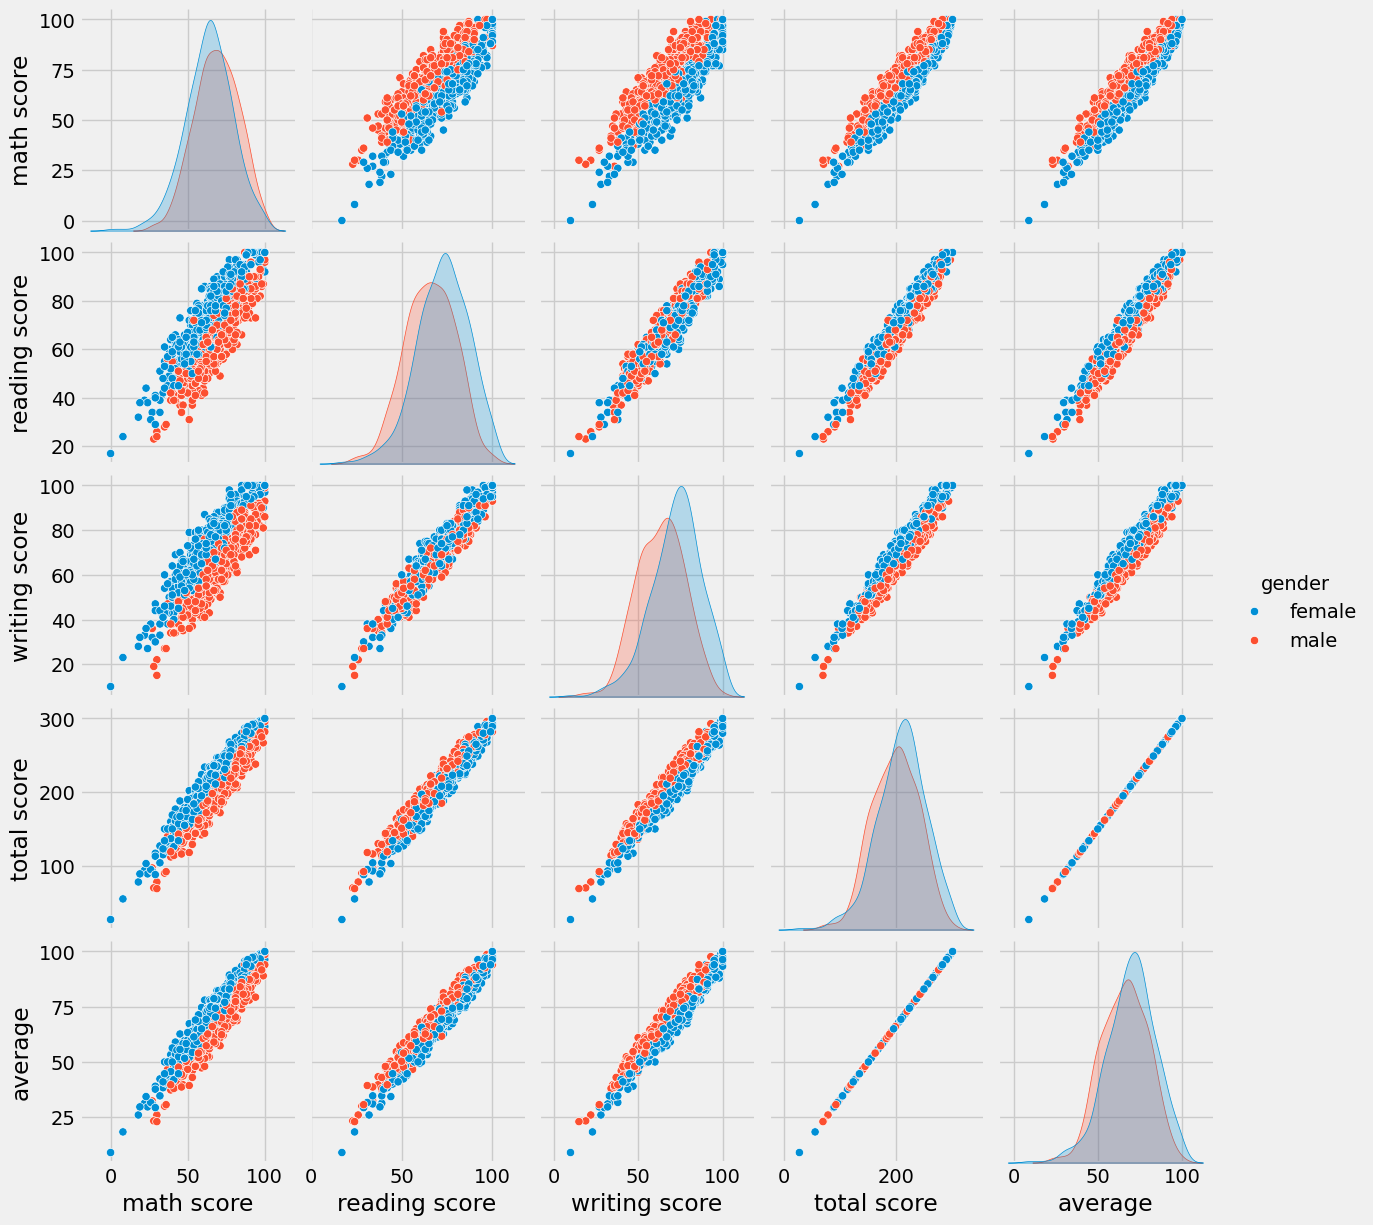

In [187]:
sns.pairplot(df,hue = 'gender')
plt.show()

__Observation__
- Above plot shows that all the scores increase linearly with each other.

**5 Conclusion**
- Race/Ethnicity, parent's education has more impact on student's performance than lunch and test preparation course.
- Female student's total score is more than male students.
- Finishing test preparation course helped students to perform better in exams.